<a href="https://colab.research.google.com/github/Raphael-Blaize/K-NN-CLASSIFIER-AND-NAIVE-BAYES-/blob/main/NAIVE_BAYES_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAIVE BAYES CLASSIFIER SOLUTIONS

## 1. Defining the Question

### a) Specifying the Question


> During this week’s Independent project, you will get to test the skills that you learned this week. More specifically, you will get the test your understanding of the following learning outcomes.

> Overall Learning Outcomes

>> I can understand and apply supervised learning algorithms such as regression, decision trees, KNN, SVM, naive Bayes, random forests to solving business problems.

>> I can understand the benefits, limitations, and requirements of various supervised learning algorithms.



### b) Defining the Metric for Success


> Able to use find the optimal k-nn parameters to increase the accuracy of my model

> No multicollinearity in the dataset in-order to acchive accurate results 

> Ensuring that the data has been preproccesed well this includes:

        1. Taking care of Outliers
        2. Taking care of missing values 
        3. Taking care of column names 
        4. Taking care of special character if there is any

> Ensuring that my dataset has also been encoded properly before applying it to the model for training 

### d) Recording the Experimental Design

> We will be conducting an EDA Analysis of the data in -order to understand the relationship in the variables by:

         1. Univariate analysis
         2. Bivarate analysis 
         3. Multi-variate analysis where needed

> We will also see the correlation between the variables using: 

         1. Heatmap to see the correlation
         2. Pearsons correlation 
         3. Chi squared where possible 

**Modelling approach**
         
        1. Naive Bayes Classifier:
> Randomly partition each dataset into two parts i.e 80 - 20, 70-30, 60-40  sets, then perform Naive Bayes classification.

> Compute the accuracy (percentage of correct classification).

> Report the confusion matrix of the classifier in each different set.

> Suggest and apply at least one of the optimization techniques.

> Provide further recommendations to improve the classifier.

## **DATASETS USED IN THIS ANALYSIS**

The Datset files used in this analysis are found from the link below

Link : [Dataset](https://archive.ics.uci.edu/ml/datasets/Spambase)









## **DATASETS DESCRIPTION**

**Data Set Information:**

> The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

> Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

> For background on spam:

Cranor, Lorrie F., LaMacchia, Brian A. Spam!
Communications of the ACM, 41(8):74-83, 1998.

          1. (a) Hewlett-Packard Internal-only Technical Report. External forthcoming.

          2. (b) Determine whether a given email is spam or not.

          3. (c) ~7% misclassification error. False positives (marking good mail as spam) are very undesirable.If we insist on zero false positives in the training/testing set, 20-25% of the spam passed through the filter.



**Attribute Information:**

> The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

> 48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

> 6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

> 1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

> 1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

> 1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

> 1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.



## **DATA SECTION**

### **IMPORTING THE LIBRARIES WE NEED AND LOOKING THROUGH OUR DATASET TO UNDERSTAND IT BETTER**

In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# getting the dataset 
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

--2021-06-10 14:07:33--  https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 702942 (686K) [application/x-httpd-php]
Saving to: ‘spambase.data.1’

spambase.data.1     100%[===================>] 686.47K  2.05MB/s    in 0.3s    

2021-06-10 14:07:34 (2.05 MB/s) - ‘spambase.data.1’ saved [702942/702942]



In [ ]:
#Reading our dataset
df = pd.read_csv('spambase.data')
## reading the first 10 rows of our dataset
df.head(10)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
5,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,0.96,1.28,0.00,0.00,0.00,0.96,0.00,0.32,3.85,0.00,0.64,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
6,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
7,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,0.76,0.92,0.00,0.00,0.00,0.00,0.00,0.15,1.23,3.53,2.00,0.0,0.00,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.30,0.00,0.00,0.00,0.0,0.0,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
8,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,0.00,0.64,0.25,0.00,0.12,0.00,0.00,0.12,1.67,0.06,0.71,0.0,0.19,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.06,0.00,0.00,0.0,0.0,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1
9,0.00,0.00,0.00,0.0,0.00,0.00,0.96,0.00,0.00,1.92,0.96,0.00,0.00,0.00,0.00,0.00,0.00,0.96,3.84,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.96,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.462,0.000,0.000,1.312,6,21,1


##### DATASET PREPROCESSING SECTION

In [ ]:
# checking the info on our ranking dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   float64
 22  

In [ ]:
#cheking the shape of our data 
df.shape

(4600, 58)

In [ ]:
#cheking for null values 
df.isnull().sum()

0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.32.2    0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.778     0
0.43      0
0.44      0
3.756     0
61        0
278       0
1         0
dtype: int64

In [ ]:
#cheking the percentage of null values in our columns
percent_miss = df.isnull().sum() * 100 / len(df)

#Putting the percentage into a dataframe
missing_dataframe = pd.DataFrame({'percent_missing': percent_miss})
missing_dataframe

,percent_missing
0,0.0
0.64,0.0
0.64.1,0.0
0.1,0.0
0.32,0.0
0.2,0.0
0.3,0.0
0.4,0.0
0.5,0.0
0.6,0.0


**Analysis of the missing values**
      
> From the above dataframe we can see that our dataset contains no null values


In [ ]:
#cheking for duplicates in the dataset 
df.duplicated().sum()

391

In [ ]:
#dropping duplicates
df.drop_duplicates(inplace = True)

#cheking if duplicates have been dropped
df.duplicated().sum()

0

There are a no duplicated values in the dataset

In [ ]:
#cheking the unique values in the column names 

#for loop to iterate through each column
for column in df.columns:
  # creating a variable columnc which will be the the content in each column
  columnc = df[column]
  #Printing the column name
  print("Column Name:", column)
  # printing the number of unique values in the column
  print(columnc.nunique())
  print("\n")

Column Name: 0
142


Column Name: 0.64
171


Column Name: 0.64.1
214


Column Name: 0.1
43


Column Name: 0.32
255


Column Name: 0.2
141


Column Name: 0.3
173


Column Name: 0.4
170


Column Name: 0.5
144


Column Name: 0.6
245


Column Name: 0.7
113


Column Name: 0.64.2
316


Column Name: 0.8
158


Column Name: 0.9
133


Column Name: 0.10
118


Column Name: 0.32.1
253


Column Name: 0.11
197


Column Name: 1.29
229


Column Name: 1.93
575


Column Name: 0.12
148


Column Name: 0.96
401


Column Name: 0.13
99


Column Name: 0.14
164


Column Name: 0.15
143


Column Name: 0.16
395


Column Name: 0.17
281


Column Name: 0.18
240


Column Name: 0.19
200


Column Name: 0.20
156


Column Name: 0.21
179


Column Name: 0.22
128


Column Name: 0.23
106


Column Name: 0.24
184


Column Name: 0.25
110


Column Name: 0.26
177


Column Name: 0.27
159


Column Name: 0.28
188


Column Name: 0.29
53


Column Name: 0.30
163


Column Name: 0.31
125


Column Name: 0.32.2
108


Column Name: 0.33
186



In [ ]:
#cheking column types
df.dtypes

0         float64
0.64      float64
0.64.1    float64
0.1       float64
0.32      float64
0.2       float64
0.3       float64
0.4       float64
0.5       float64
0.6       float64
0.7       float64
0.64.2    float64
0.8       float64
0.9       float64
0.10      float64
0.32.1    float64
0.11      float64
1.29      float64
1.93      float64
0.12      float64
0.96      float64
0.13      float64
0.14      float64
0.15      float64
0.16      float64
0.17      float64
0.18      float64
0.19      float64
0.20      float64
0.21      float64
0.22      float64
0.23      float64
0.24      float64
0.25      float64
0.26      float64
0.27      float64
0.28      float64
0.29      float64
0.30      float64
0.31      float64
0.32.2    float64
0.33      float64
0.34      float64
0.35      float64
0.36      float64
0.37      float64
0.38      float64
0.39      float64
0.40      float64
0.41      float64
0.42      float64
0.778     float64
0.43      float64
0.44      float64
3.756     float64
61        

In [ ]:
#Cheking for outliers

# dealing with the outliers using quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(df1.shape)

# Printing the shape of our old dataset
print(df.shape)

(114, 58)
(4209, 58)


> Since i cannot plot a boxplot to see the number of outliers in our dataset i used the quantile method to see the shape of my dataset after the outliers were droppped

> I will use my orginal dataset because the shape after dropping the outliers was greatly reduced, and will not help when forming anytype of analysis 

### EDA ANALYSIS

#### **PERFORMING UNIVARIATE ANALYSIS** 

In [ ]:
df.dtypes

0         float64
0.64      float64
0.64.1    float64
0.1       float64
0.32      float64
0.2       float64
0.3       float64
0.4       float64
0.5       float64
0.6       float64
0.7       float64
0.64.2    float64
0.8       float64
0.9       float64
0.10      float64
0.32.1    float64
0.11      float64
1.29      float64
1.93      float64
0.12      float64
0.96      float64
0.13      float64
0.14      float64
0.15      float64
0.16      float64
0.17      float64
0.18      float64
0.19      float64
0.20      float64
0.21      float64
0.22      float64
0.23      float64
0.24      float64
0.25      float64
0.26      float64
0.27      float64
0.28      float64
0.29      float64
0.30      float64
0.31      float64
0.32.2    float64
0.33      float64
0.34      float64
0.35      float64
0.36      float64
0.37      float64
0.38      float64
0.39      float64
0.40      float64
0.41      float64
0.42      float64
0.778     float64
0.43      float64
0.44      float64
3.756     float64
61        

####  Numerical variables

######  a) Measures of central tendancy

In [ ]:
#Mean
for column in df:
  # Selecting column contents by column name using [] operator
       columncontent = df[column]
       print('Colunm Name', column)
       print('Column mean:', columncontent.mean())
       print()

Colunm Name 0
Column mean: 0.10439059158945117

Colunm Name 0.64
Column mean: 0.11253029223093379

Colunm Name 0.64.1
Column mean: 0.2913898788310763

Colunm Name 0.1
Column mean: 0.06309337134711335

Colunm Name 0.32
Column mean: 0.3253219291993342

Colunm Name 0.2
Column mean: 0.09667854597291525

Colunm Name 0.3
Column mean: 0.11750296982656208

Colunm Name 0.4
Column mean: 0.1080256593014967

Colunm Name 0.5
Column mean: 0.09188168210976473

Colunm Name 0.6
Column mean: 0.24847944880019038

Colunm Name 0.7
Column mean: 0.0566999287241625

Colunm Name 0.64.2
Column mean: 0.5651865051081021

Colunm Name 0.8
Column mean: 0.09767878355904006

Colunm Name 0.9
Column mean: 0.061225944404846744

Colunm Name 0.10
Column mean: 0.04481349489189837

Colunm Name 0.32.1
Column mean: 0.25381325730577364

Colunm Name 0.11
Column mean: 0.14918983131385122

Colunm Name 1.29
Column mean: 0.18849370396768836

Colunm Name 1.93
Column mean: 1.7183178902352094

Colunm Name 0.12
Column mean: 0.0849821810

In [ ]:
# median
for column in df:
  columncontent = df[column]
  print("Column Name", column)
  print("Column Median", columncontent.median())
  print()

Column Name 0
Column Median 0.0

Column Name 0.64
Column Median 0.0

Column Name 0.64.1
Column Median 0.0

Column Name 0.1
Column Median 0.0

Column Name 0.32
Column Median 0.0

Column Name 0.2
Column Median 0.0

Column Name 0.3
Column Median 0.0

Column Name 0.4
Column Median 0.0

Column Name 0.5
Column Median 0.0

Column Name 0.6
Column Median 0.0

Column Name 0.7
Column Median 0.0

Column Name 0.64.2
Column Median 0.19

Column Name 0.8
Column Median 0.0

Column Name 0.9
Column Median 0.0

Column Name 0.10
Column Median 0.0

Column Name 0.32.1
Column Median 0.0

Column Name 0.11
Column Median 0.0

Column Name 1.29
Column Median 0.0

Column Name 1.93
Column Median 1.36

Column Name 0.12
Column Median 0.0

Column Name 0.96
Column Median 0.29

Column Name 0.13
Column Median 0.0

Column Name 0.14
Column Median 0.0

Column Name 0.15
Column Median 0.0

Column Name 0.16
Column Median 0.0

Column Name 0.17
Column Median 0.0

Column Name 0.18
Column Median 0.0

Column Name 0.19
Column Median 

In [ ]:
# variance
for column in df:
  columncontent = df[column]
  print("Column Name", column)
  print("Column Variance:", columncontent.var())
  print()

Column Name 0
Column Variance: 0.09002173523465819

Column Name 0.64
Column Variance: 0.20633511225944084

Column Name 0.64.1
Column Variance: 0.2659999451541911

Column Name 0.1
Column Variance: 1.8296543071070361

Column Name 0.32
Column Variance: 0.47318840037690957

Column Name 0.2
Column Variance: 0.07620859459902747

Column Name 0.3
Column Variance: 0.15786854948024176

Column Name 0.4
Column Variance: 0.16836889097644897

Column Name 0.5
Column Variance: 0.07962202877321406

Column Name 0.6
Column Variance: 0.43126189840122614

Column Name 0.7
Column Variance: 0.03392463450807811

Column Name 0.64.2
Column Variance: 0.779013041490867

Column Name 0.8
Column Variance: 0.09569273329738164

Column Name 0.9
Column Variance: 0.11978903852824255

Column Name 0.10
Column Variance: 0.058667509171462316

Column Name 0.32.1
Column Variance: 0.6362113348906857

Column Name 0.11
Column Variance: 0.2095054508851529

Column Name 1.29
Column Variance: 0.2926066183657804

Column Name 1.93
Colum

In [ ]:
#cheking for skewnwess in my columns
# also cheking if the columns is postiviley or negative;y skewed
# defining a custom function called my_skew to check the skewness of each column

def my_skew():
  #iterating through each column name 
  for column in df:
    columncontent = df[column]#setting the column content to be the column name after each iteration
    skew = columncontent.skew() #Getting the skewness of column content
    if skew > 0 :
      print("Positively skewed") 
    elif skew == 0 :
      print("Symmetric distribution")
    else:
      print("negatively skewed")

    print("Column Name", column, "....")
    print("Column skewness:", skew)
    print("\n")

#calling the function
print(my_skew())

Positively skewed
Column Name 0 ....
Column skewness: 5.869173727940259


Positively skewed
Column Name 0.64 ....
Column skewness: 13.469991513513268


Positively skewed
Column Name 0.64.1 ....
Column skewness: 2.9811627768769746


Positively skewed
Column Name 0.1 ....
Column skewness: 27.206297575969852


Positively skewed
Column Name 0.32 ....
Column skewness: 4.696382772659861


Positively skewed
Column Name 0.2 ....
Column skewness: 6.1219544253119516


Positively skewed
Column Name 0.3 ....
Column skewness: 6.807906579773227


Positively skewed
Column Name 0.4 ....
Column skewness: 9.733133596027866


Positively skewed
Column Name 0.5 ....
Column skewness: 5.283654571595999


Positively skewed
Column Name 0.6 ....
Column skewness: 8.567741898908952


Positively skewed
Column Name 0.7 ....
Column skewness: 5.077636973477189


Positively skewed
Column Name 0.64.2 ....
Column skewness: 2.8277365521173525


Positively skewed
Column Name 0.8 ....
Column skewness: 6.8891610370263034




In [ ]:
#Getting the Kurtosis of the columns
def kurt():
  for column in df:
    columncontent = df[column]
    kurt = columncontent.kurt()
    if kurt > 3:
      print('It is leptokurtic distribution')
    elif kurt < 3:
      print('It is platykurtic distribution')
    else:
      print('It is mesokurtic distribution') 
    print("Column Name :", column)
    print("Kutorsis Value:", kurt)
    print("\n")
 
print(kurt())

It is leptokurtic distribution
Column Name : 0
Kutorsis Value: 54.339150808949654


It is leptokurtic distribution
Column Name : 0.64
Kutorsis Value: 306.8253529808409


It is leptokurtic distribution
Column Name : 0.64.1
Kutorsis Value: 12.94299101097194


It is leptokurtic distribution
Column Name : 0.1
Kutorsis Value: 788.1819174508497


It is leptokurtic distribution
Column Name : 0.32
Kutorsis Value: 37.055261098523694


It is leptokurtic distribution
Column Name : 0.2
Kutorsis Value: 71.58787084702482


It is leptokurtic distribution
Column Name : 0.3
Kutorsis Value: 76.3641949123544


It is leptokurtic distribution
Column Name : 0.4
Kutorsis Value: 167.51293337575424


It is leptokurtic distribution
Column Name : 0.5
Kutorsis Value: 48.00020082630735


It is leptokurtic distribution
Column Name : 0.6
Kutorsis Value: 162.5079296988639


It is leptokurtic distribution
Column Name : 0.7
Kutorsis Value: 34.64739113970077


It is leptokurtic distribution
Column Name : 0.64.2
Kutorsis

In [21]:
#describing my dataset
df.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000
mean,0.104391,0.112530,0.291390,0.063093,0.325322,0.096679,0.117503,0.108026,0.091882,0.248479,0.056700,0.565187,0.097679,0.061226,0.044813,0.253813,0.149190,0.188494,1.718318,0.084982,0.810005,0.131618,0.100646,0.090991,0.574132,0.279397,0.369926,0.128605,0.098406,0.103804,0.063559,0.044928,0.102357,0.045788,0.107907,0.099392,0.143516,0.014193,0.084077,0.061292,0.041442,0.141575,0.048784,0.085286,0.320200,0.189420,0.005788,0.034754,0.040413,0.144082,0.017380,0.281018,0.076075,0.045809,5.384282,52.137800,291.18508,0.398670
std,0.300036,0.454241,0.515752,1.352647,0.687887,0.276059,0.397327,0.410328,0.282174,0.656705,0.184186,0.882617,0.309342,0.346106,0.242214,0.797629,0.457718,0.540931,1.768967,0.505641,1.149486,1.071384,0.351375,0.431772,1.676715,0.905650,1.775532,0.535489,0.576863,0.439618,0.387312,0.300783,0.569211,0.301847,0.530323,0.386513,0.424553,0.230539,0.448043,0.319556,0.318214,0.793895,0.231898,0.646171,1.046027,0.928413,0.079180,0.298556,0.252562,0.274280,0.105743,0.843387,0.239734,0.435976,33.151287,199.605834,618.72831,0.489683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627000,7.000000,40.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.00000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.830000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,2.720000,0.000000,1.280000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

##### Distributions 

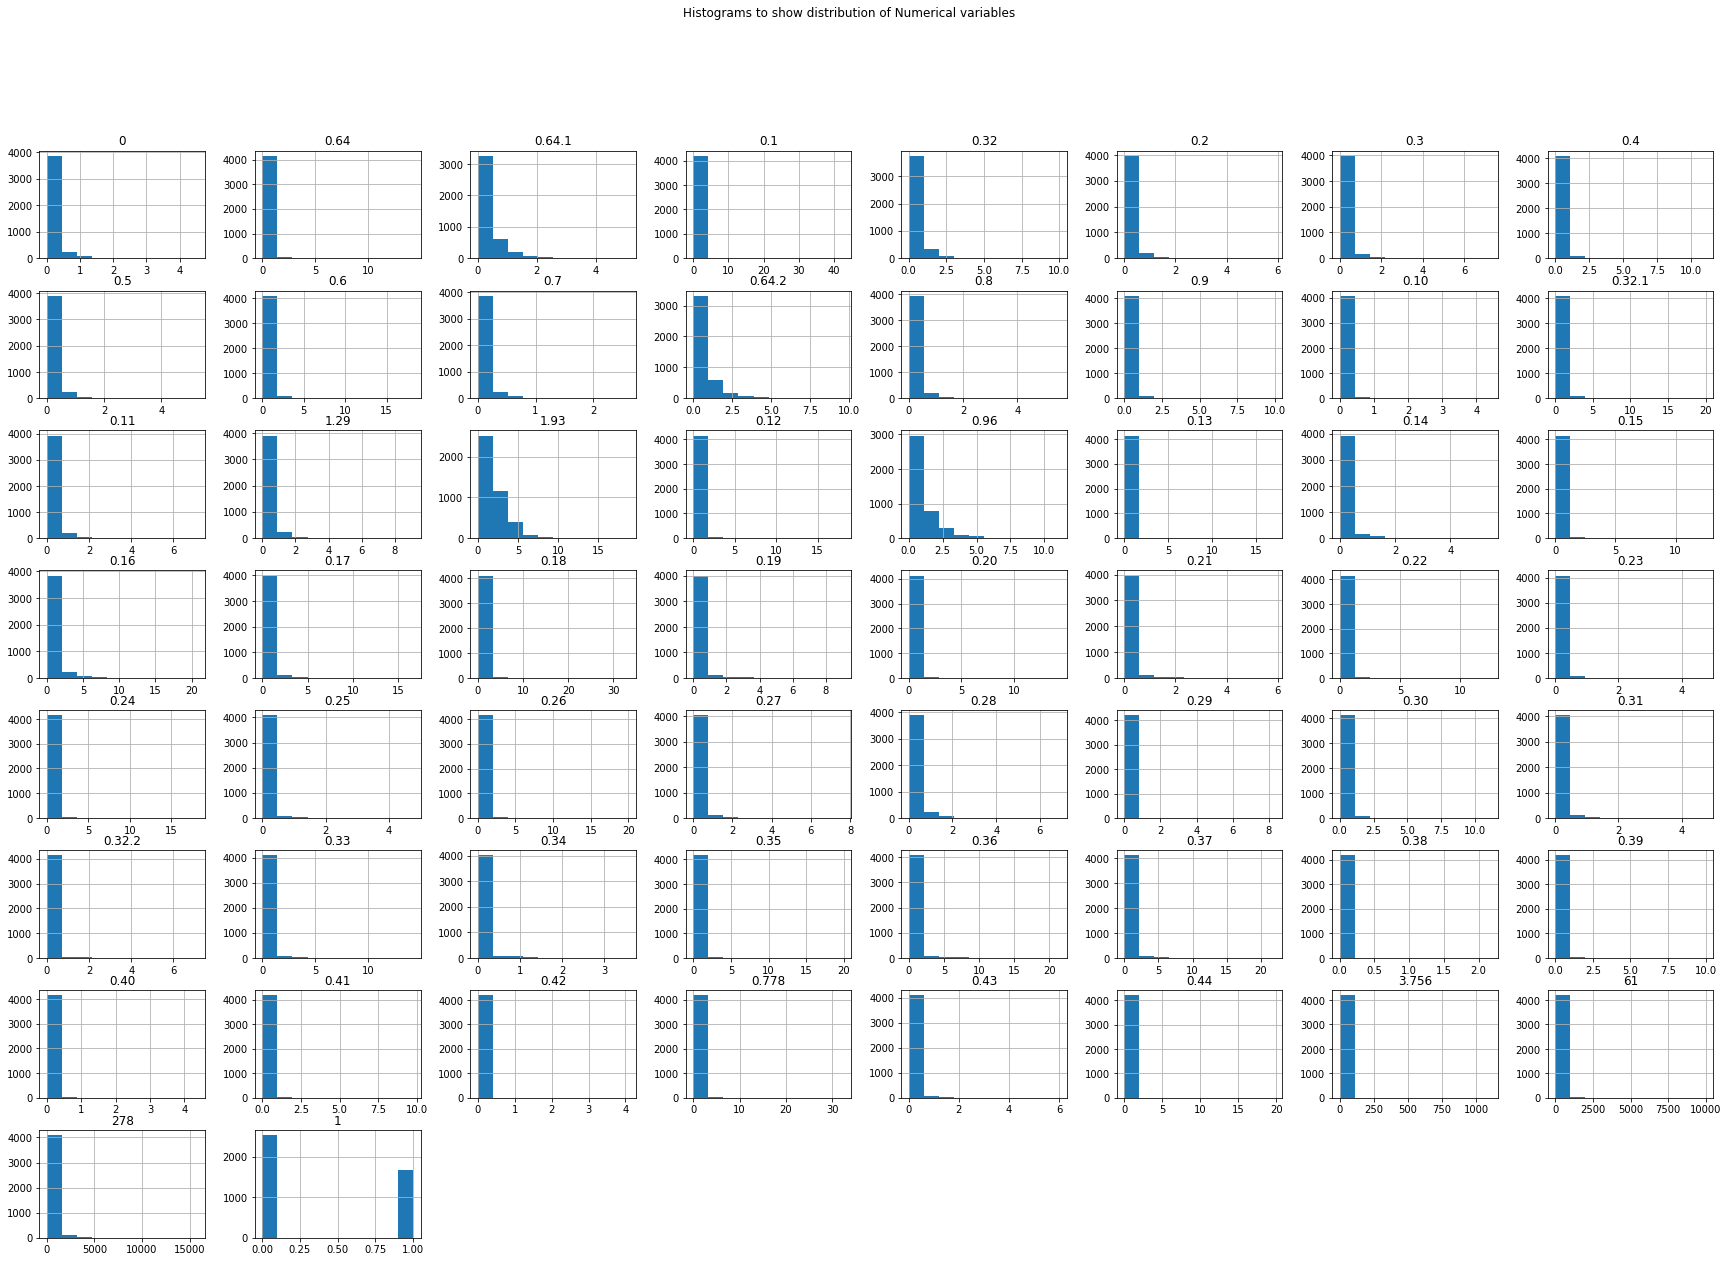

In [ ]:
df.hist(bins=10, figsize=(30,20))
plt.suptitle('Histograms to show distribution of Numerical variables')
plt.show()

Due to the datasets large number of features visualising some of the analysis is going to be difficult so i will stop at univariate and continue on to implementing the solution

## IMPLEMENTING THE SOLUTION

#### NAIVE BAYES CLASSIFIER

In [22]:
df.columns

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1'],
      dtype='object')

##### CHECKING FOR MULTICOLLINEARITY IN OUR DATASET 

Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable. For example, let’s assume that in the following linear equation:

Y = W0+W1*X1+W2*X2

Coefficient W1 is the increase in Y for a unit increase in X1 while keeping X2 constant. But since X1 and X2 are highly correlated, changes in X1 would also cause changes in X2 and we would not be able to see their individual effect on Y.

Inaccurate use of dummy variables can also cause a multicollinearity problem. This is called the Dummy variable trap:



In [23]:
# VIF (Variable Inflation Factors)
# VIF score of an independent variable represents how well the variable is explained by other independent variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [34]:
df1 = df.iloc[:, :-1]
calc_vif(df1)

,variables,VIF
0,0,1.229443
1,0.64,1.173240
2,0.64.1,1.400624
3,0.1,1.006264
4,0.32,1.324895
5,0.2,1.192636
6,0.3,1.216058
7,0.4,1.173640
8,0.5,1.314236
9,0.6,1.275231


> From the above VIF dataframe we can see that 

         Column      VIF
      1. 0.23        104.453527
      2. 0.25        101.699560

> Are the two columns with the highest VIF score so i will drop them 

In [35]:
df1.drop(columns = ['0.23', '0.25'], inplace=True)
df1

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.24,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


##### FEATURE REDUCTION TECHNIQUE TO FIND THE BEST FEATURES TO USE 

In [39]:
# using LDA to get the coeeficients and the variables that affect my target column the most 

feat = df1
income_label = df['1']

# Import Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Create an instance of LDA
lda = LDA()
lda_= lda.fit(feat,income_label)
lda_feat=lda_.transform(feat)
# Display the coeficients of the reducted columns
lda_.coef_

array([[-1.14221476e-01,  6.92656681e-02,  2.92926146e-01,
         1.24787693e-01,  7.47260260e-01,  1.07868632e+00,
         1.97021620e+00,  8.05453039e-01,  6.04503764e-01,
         6.13114082e-02,  1.34578560e+00, -2.70941096e-01,
         3.69968177e-02,  2.49020027e-02,  2.43075392e-01,
         7.89653396e-01,  4.41106929e-01,  4.19271406e-01,
         1.18100674e-01,  5.42352153e-01,  5.26332575e-01,
         4.28726959e-01,  1.55555970e+00,  6.93734456e-01,
        -2.19041646e-01, -1.81510559e-01, -1.74303805e-01,
         7.61525392e-02, -6.82691133e-02, -4.55681633e-01,
        -1.69499036e-01, -3.81457890e-01, -2.94545074e-01,
         2.55761076e-01, -4.59601234e-01, -5.22418757e-01,
        -1.60240128e-01,  7.20597059e-01, -1.46375960e-01,
        -3.33011365e-01, -4.97573403e-01, -2.93957643e-01,
        -3.12871562e-01, -3.45762131e-01, -1.79123910e+00,
        -5.18450618e-01, -1.37556774e+00, -6.48511968e-01,
        -5.25491882e-01,  5.99057020e-01,  2.37848763e+0

In [40]:
# Since the coefficients are in an array, we needto create a dataframe so that we can extract the name of the columns
f_imp = pd.DataFrame(index=feat.columns.values, data=lda_.coef_[0].T)
f_imp.sort_values(0, ascending=False)

,0
0.43,2.378488
0.3,1.970216
0.14,1.555560
0.7,1.345786
0.2,1.078686
0.4,0.805453
0.32.1,0.789653
0.32,0.747260
0.31,0.720597
0.15,0.693734


From the above LDA we can pick the first 10 varibales because they seem to to have the highest coefficients, this means that those variables affect my target varibale the most compared to other varibales

##### MODELLING

######  **80 : 20 split Naive bayes**:

In [70]:
# matrix of fetaures x and dv
x = df1[['0.43', '0.3', '0.14', '0.7', '0.2', '0.4', '0.32.1', '0.32', '0.31', '0.15']]
y = df['1']

from sklearn import naive_bayes 
from sklearn.model_selection import train_test_split

Gaussian = naive_bayes.GaussianNB()
Multi = naive_bayes.MultinomialNB()
Bern = naive_bayes.BernoulliNB()

classifier = [Gaussian, Multi, Bern]

# model names 
classifier_name = ['Gaussian', 'Multinomial', 'Bernoulli']

for model, name in zip(classifier, classifier_name):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

  # Feature Scaling
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  # transform data
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)

  #Training the Naive bayes models  on the Training set
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  #getting the accuracy of the model
  from sklearn.metrics import accuracy_score, classification_report
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)

  from sklearn.metrics import f1_score
  from sklearn.metrics import fbeta_score
  # Printing out the accuracy
  print("The accuracy score for", name, "is", accuracy)
  print("The f1 score is:", f1_score(y_test, y_pred))
  print("The f1_Beta score is:", fbeta_score(y_test, y_pred, beta = 0.5))  
  print("\n") 
  print("CLASSIFICATION REPORT OF", name)
  print(classification_report(y_test, y_pred))
  print("\n") 

The accuracy score for Gaussian is 0.832541567695962
The f1 score is: 0.7630252100840338
The f1_Beta score is: 0.8476474981329349


CLASSIFICATION REPORT OF Gaussian
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       495
           1       0.92      0.65      0.76       347

    accuracy                           0.83       842
   macro avg       0.86      0.81      0.82       842
weighted avg       0.85      0.83      0.83       842



The accuracy score for Multinomial is 0.6223277909738717
The f1 score is: 0.15425531914893617
The f1_Beta score is: 0.3131749460043196


CLASSIFICATION REPORT OF Multinomial
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       495
           1       1.00      0.08      0.15       347

    accuracy                           0.62       842
   macro avg       0.80      0.54      0.46       842
weighted avg       0.77      0.62      0.51       842



Th

######  **70: 30 split Naive bayes**:

In [71]:
# matrix of fetaures x and dv
x = df1[['0.43', '0.3', '0.14', '0.7', '0.2', '0.4', '0.32.1', '0.32', '0.31', '0.15']]
y = df['1']

from sklearn import naive_bayes 
from sklearn.model_selection import train_test_split

Gaussian = naive_bayes.GaussianNB()
Multi = naive_bayes.MultinomialNB()
Bern = naive_bayes.BernoulliNB()

classifier = [Gaussian, Multi, Bern]

# model names 
classifier_name = ['Gaussian', 'Multinomial', 'Bernoulli']

for model, name in zip(classifier, classifier_name):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

  # Feature Scaling
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  # transform data
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)

  #Training the Naive bayes models  on the Training set
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  #getting the accuracy of the model
  from sklearn.metrics import accuracy_score, classification_report
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)

  from sklearn.metrics import f1_score
  from sklearn.metrics import fbeta_score
  # Printing out the accuracy
  print("The accuracy score for", name, "is", accuracy)
  print("The f1 score is:", f1_score(y_test, y_pred))
  print("The f1_Beta is:", fbeta_score(y_test, y_pred, beta = 0.5))  
  print("\n") 
  print("CLASSIFICATION REPORT OF", name)
  print(classification_report(y_test, y_pred))
  print("\n") 

The accuracy score for Gaussian is 0.831353919239905
The f1 score is: 0.7641196013289038
The f1_Beta is: 0.8480825958702065


CLASSIFICATION REPORT OF Gaussian
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       737
           1       0.92      0.66      0.76       526

    accuracy                           0.83      1263
   macro avg       0.86      0.81      0.82      1263
weighted avg       0.85      0.83      0.83      1263



The accuracy score for Multinomial is 0.613618368962787
The f1 score is: 0.13780918727915192
The f1_Beta is: 0.28425655976676384


CLASSIFICATION REPORT OF Multinomial
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       737
           1       0.97      0.07      0.14       526

    accuracy                           0.61      1263
   macro avg       0.79      0.54      0.44      1263
weighted avg       0.76      0.61      0.50      1263



The accuracy s

######  **60:40 split Naive bayes**:

In [72]:
# matrix of fetaures x and dv
x = df1[['0.43', '0.3', '0.14', '0.7', '0.2', '0.4', '0.32.1', '0.32', '0.31', '0.15']]
y = df['1']

from sklearn import naive_bayes 
from sklearn.model_selection import train_test_split

Gaussian = naive_bayes.GaussianNB()
Multi = naive_bayes.MultinomialNB()
Bern = naive_bayes.BernoulliNB()

classifier = [Gaussian, Multi, Bern]

# model names 
classifier_name = ['Gaussian', 'Multinomial', 'Bernoulli']

for model, name in zip(classifier, classifier_name):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)

  # Feature Scaling
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  # transform data
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)

  #Training the Naive bayes models  on the Training set
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  #getting the accuracy of the model
  from sklearn.metrics import accuracy_score, classification_report
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)

  from sklearn.metrics import f1_score
  from sklearn.metrics import fbeta_score
  # Printing out the accuracy
  print("The accuracy score for", name, "is", accuracy)
  print("The f1 score is:", f1_score(y_test, y_pred))
  print("The f1_Beta is:", fbeta_score(y_test, y_pred, beta = 0.5))  
  print("\n") 
  print("CLASSIFICATION REPORT OF", name)
  print(classification_report(y_test, y_pred))
  print("\n") 

The accuracy score for Gaussian is 0.8254156769596199
The f1 score is: 0.7521079258010118
The f1_Beta is: 0.8339566192969335


CLASSIFICATION REPORT OF Gaussian
              precision    recall  f1-score   support

           0       0.79      0.95      0.87       994
           1       0.90      0.65      0.75       690

    accuracy                           0.83      1684
   macro avg       0.85      0.80      0.81      1684
weighted avg       0.84      0.83      0.82      1684



The accuracy score for Multinomial is 0.6175771971496437
The f1 score is: 0.12737127371273713
The f1_Beta is: 0.26643990929705214


CLASSIFICATION REPORT OF Multinomial
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       994
           1       0.98      0.07      0.13       690

    accuracy                           0.62      1684
   macro avg       0.79      0.53      0.44      1684
weighted avg       0.76      0.62      0.50      1684



The accuracy

##### **CONCLUSIONS**

 

---



---




**80-20 Split**

> GaussianNB

     1. Accuracy - 83.2%
     2. F1_score - 76%
     3. F1_Beta score - 84%


> MultinomialNB
      
      1. Accuracy - 62%
      2. F1_score - 15%
      3. F1_Beta score - 31%
       
> BernoulliNB

     1. Accuracy - 82%
     2. F1_score - 77 %
     3. F1_Beta score - 80%



---

---


**70-30 Split**

> GaussianNB

     1. Accuracy - 83%
     2. F1_score - 76%
     3. F1_Beta score - 84.8%


> MultinomialNB
      
      1. Accuracy - 61.3%
      2. F1_score - 13.7%
      3. F1_Beta score - 28.4%
       
> BernoulliNB

     1. Accuracy - 83.2%
     2. F1_score - 78.1%
     3. F1_Beta score - 82.53%



---


---



**60-40 Split**

> GaussianNB

     1. Accuracy - 82%
     2. F1_score - 75%
     3. F1_Beta score - 83.3%


> MultinomialNB
      
      1. Accuracy - 61.7%
      2. F1_score - 12.7%
      3. F1_Beta score - 26.6%
       
> BernoulliNB

     1. Accuracy - 83%
     2. F1_score - 77.5%
     3. F1_Beta score - 81.8%



> From the above conclusion we can see that 70-30 split performed the best in GaussianNB comapred to the other splits 

> 80-20 split had the highest accuracy in MultinomiaNB at 62% compared to the other splits 

> The 70-30 split also performed the best in BernoulliNB compared to the other splits 

> Recommendation is to use the 70-30 split as it is the most optimal split because it performs the best in two classifiers

> MulitnomialNB should also not be used as it does not do well with this dataset 